# Задание 1. Двухточечная квадратура Гаусса.

Постройте квадратурную формулу Гаусса, интегрирующую точно многочлены степеней вплоть до третьей на интервале 
. Заметим, что для этого достаточно построить двухточечную квадратуру.

Напишите функцию, которая возвращает веса, 
 и 
, и узлы, 
 и 
, двухточечной квадратурной формулы Гаусса с весовой функцией 
, т.е., интегралы вида



In [1]:
import numpy as np
from math import sqrt

def gauss_2(a, b):
    r"""Return nodes and weights for a two-point Gauss quadrature on [a, b].
    
    Parameters
    ----------
    a, b : float
       Boundaries of the integration interval
       
    Returns
    -------
    x1, x2, w1, w2 : float
       Nodes and weights of the quadrature.
    """
    
    xi1 = -1 / sqrt(3)
    xi2 =  1 / sqrt(3)
    
    
    x1 = 0.5 * (b - a) * xi1 + 0.5 * (a + b)
    x2 = 0.5 * (b - a) * xi2 + 0.5 * (a + b)
    

    w1 = (b - a) / 2
    w2 = (b - a) / 2
    
    return x1, x2, w1, w2



from numpy.testing import assert_allclose

x1, x2, w1, w2 = gauss_2(0, 1)

def f(x, n): 
    return x**n

for n in [0, 1, 2, 3]:
    assert_allclose(w1*f(x1, n=n) + w2*f(x2, n=n),
                    1./(n+1), atol=1e-14)

# Задание 2. Вычитание интегрируемых сингулярностей.

Вычислите определённый интеграл методом трапеций с вычитанием сингулярности

 
Вам могут пригодиться значения следующих определенных интегралов:

 
 
Преобразуйте данный интеграл, вычитая сингулярности. Выпишите расчетные формулы. Cоставьте функцию, возвращающую значение интеграла методом трапеций.

$L(x) = 1 + (e-1)x$ - аналитическая часть интеграла

$R(x) = e^{x} - L(x)$

In [11]:
import numpy as np
from math import pi, e, sqrt, exp

def integ(npts=10):
    """Compute the value of the integral above.
    
    Subtract the singularities and use the trapezoid rule. 
    
    Parameters
    ----------
    npts : int
        The number of points for the trapezoid rule
        
    Returns
    -------
    I : float
       The computed value of the integral
    """
    # Аналитическая часть:
    I_sing = pi * (1 + (e - 1) / 2)
    
    # Вычисляем численно остаток:
    x = np.linspace(0, 1, npts)
    # Вычисляем R(x) = e^x - [1+(e-1)x]
    R = np.exp(x) - (1 + (e - 1) * x)
    
    # Вычисляем знаменатель sqrt(x(1-x)).
    # Чтобы избежать деления на 0 в точках x=0 и x=1, задаём значение функции 0 там (т.к. R(0)=R(1)=0).
    denom = np.sqrt(x * (1 - x))
    f = np.where(denom == 0, 0.0, R / denom)
    
    # Трапециевидное правило
    h = 1 / (npts - 1)
    I_rem = h * (0.5 * f[0] + np.sum(f[1:-1]) + 0.5 * f[-1])
    
    return I_sing + I_rem


I = integ(npts=50)
print("Вычисленное значение интеграла I =", I)


Вычисленное значение интеграла I = 5.509469677731367


/var/folders/53/880xqn1n18v5tqys3bh_0rhc0000gn/T/ipykernel_97681/3749488320.py:30: RuntimeWarning: invalid value encountered in divide
  f = np.where(denom == 0, 0.0, R / denom)


# Задание 4. Вычисление интеграла с внутренней особенностью.

Найти δ1 δ2 и таĸие, чтобы при вычислении интеграла
J= ∫0,5
−0,5
|x|−2⋅ (1− x)−
1
2 dx
 
 
модуль |ρ| < ε ε− , где требуемая точность расчетов


В нашем случае имеем особенность в нуле, в ней интеграл ведет себя ~ $x^{1/2}$
Если имеем точность $\epsilon$, возьмем $\delta_{1} = \delta_{2} = \delta$

Тогда $I_{0} = \int_{-\delta}^{\delta} |x|^{-1/2} dx = 4\sqrt{\delta} < \epsilon$ 

То есть:
$\delta < \frac{{\epsilon}^2}{16}$

# Задание 5. Интеграл от быстроосциллирующей функции.

Вычислите интеграл от быстроосциллирующей функции

для различных значений 
 по методу Симпсона, а затем используя прием, описанный ранее, заменяя функцию 
 ее интерполяционным полиномом второй степени (третьей степени). Совпадает-ли точность расчетов с ожидаемой? Сравните с точным значением интеграла, который равен

 


k    Exact           Simpson         Poly (deg=2)      Poly (deg=3)
5    0.200618061205  0.200618061267  0.200618061200  0.200618061200  
10   0.094731295221  0.094731295724  0.094731295206  0.094731295218  
20   0.047720004077  0.047720008190  0.047720004046  0.047720004070  
50   0.019128070407  0.019128135241  0.019128070328  0.019128070389  
200  0.004783810813  0.004788155742  0.004783810450  0.004783810734  
2000 0.000478392921  0.000000000000  0.000478393041  0.000478392947  


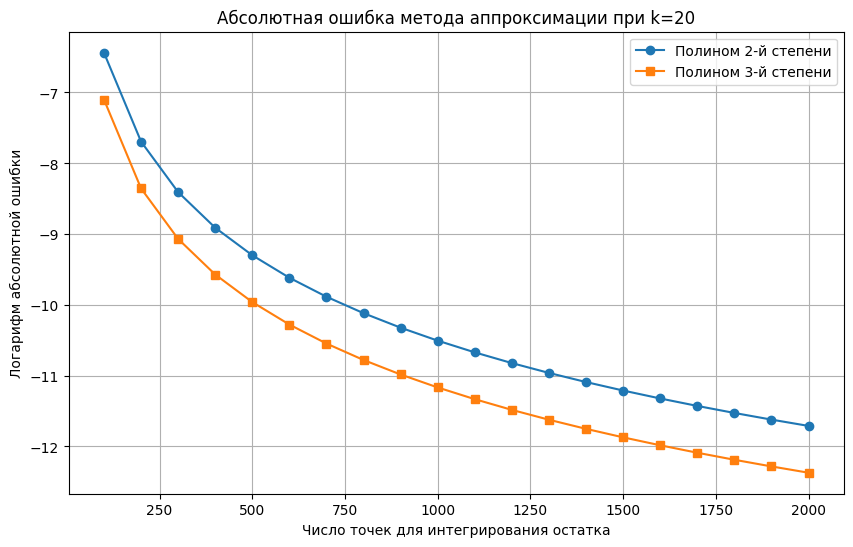

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def I0(k):
    
    return (1 - np.cos(k * np.pi)) / k

def I1(k):
    
    return (-k * np.pi * np.cos(k * np.pi) + np.sin(k * np.pi)) / (k**2)

def I2(k):
    
    return (-2 + (2 - k**2 * np.pi**2) * np.cos(k * np.pi) + 2 * k * np.pi * np.sin(k * np.pi)) / (k**3)

def I3(k):

    return (k * np.pi * (6 - k**2 * np.pi**2) * np.cos(k * np.pi) + 
            3 * (-2 + k**2 * np.pi**2) * np.sin(k * np.pi)) / (k**4)

def exact_integral(k):
    """
    Точное значение интеграла:
       J_exact(k) = [k - e^(-π)*(k*cos(kπ) + sin(kπ))] / (1+k^2)
    """
    return (k - np.exp(-np.pi) * (k * np.cos(k * np.pi) + np.sin(k * np.pi))) / (1 + k**2)

def f(x, k):
    return np.exp(-x) * np.sin(k * x)

def simpson_integration(k, n=1000):
    """
    Вычисление интеграла методом Симпсона.
    """
    x = np.linspace(0, np.pi, n + 1)
    y = f(x, k)
    h = np.pi / n
    S = y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2])
    return S * h / 3

def poly_approximation(degree):
    """
    Аппроксимирует e^(–x) на [0, π] полиномом степени degree.
    Для degree=2: используем узлы [0, π/2, π];
    для degree=3: узлы [0, π/3, 2π/3, π].
    """
    if degree == 2:
        x_nodes = np.array([0, np.pi/2, np.pi])
    elif degree == 3:
        x_nodes = np.array([0, np.pi/3, 2*np.pi/3, np.pi])
    else:
        x_nodes = np.linspace(0, np.pi, degree+1)
    y_nodes = np.exp(-x_nodes)
    p = np.polyfit(x_nodes, y_nodes, degree)
    return p  

def poly_approx_integration(k, degree=2, npts=1000):
    """
    Вычисляет интеграл методом, когда:
      e^(–x) ≈ g(x) (полином степени degree)
    
    Тогда:
      J(k) = I_anal + I_rem,
    где
      I_anal = ∫₀^π g(x) sin(kx) dx  (анализируется аналитически),
      I_rem  = ∫₀^π [e^(–x)-g(x)] sin(kx) dx  (вычисляется численно методом Симпсона).
    """
    # Аппроксимируем e^(–x) полиномом g(x)
    p = poly_approximation(degree)
    
    # Аналитическая часть:
    
    if degree == 2:
        a2, a1, a0 = p  
        I_anal = a2 * I2(k) + a1 * I1(k) + a0 * I0(k)
    elif degree == 3:
        a3, a2, a1, a0 = p
        I_anal = a3 * I3(k) + a2 * I2(k) + a1 * I1(k) + a0 * I0(k)
    
    # Численная часть:
    
    x = np.linspace(0, np.pi, npts + 1)
    g_x = np.polyval(p, x)
    remainder = np.exp(-x) - g_x
    y_rem = remainder * np.sin(k * x)
    h = np.pi / npts
    S = y_rem[0] + y_rem[-1] + 4 * np.sum(y_rem[1:-1:2]) + 2 * np.sum(y_rem[2:-2:2])
    I_rem = S * h / 3
    
    return I_anal + I_rem

# Демонстрация для нескольких значений k:
k_values = [5, 10, 20, 50, 200, 2000]
print("k    Exact           Simpson         Poly (deg=2)      Poly (deg=3)")
for k in k_values:
    I_exact = exact_integral(k)
    I_simp = simpson_integration(k, n=1000)
    I_poly2 = poly_approx_integration(k, degree=2, npts=1000)
    I_poly3 = poly_approx_integration(k, degree=3, npts=1000)
    print(f"{k:<5}{I_exact:<16.12f}{I_simp:<16.12f}{I_poly2:<16.12f}{I_poly3:<16.12f}")


k_fixed = 20
npts_arr = np.arange(100, 2001, 100)
err_poly2 = []
err_poly3 = []
for npts in npts_arr:
    err_poly2.append(abs(poly_approx_integration(k_fixed, degree=2, npts=npts) - exact_integral(k_fixed)))
    err_poly3.append(abs(poly_approx_integration(k_fixed, degree=3, npts=npts) - exact_integral(k_fixed)))
    
plt.figure(figsize=(10,6))
plt.plot(npts_arr, np.log10(err_poly2), 'o-', label="Полином 2-й степени")
plt.plot(npts_arr, np.log10(err_poly3), 's-', label="Полином 3-й степени")
plt.xlabel("Число точек для интегрирования остатка")
plt.ylabel("Логарифм абсолютной ошибки")
plt.title(f"Абсолютная ошибка метода аппроксимации при k={k_fixed}")
plt.legend()
plt.grid(True)
plt.show()
